In [3]:
from google.colab import drive
drive._mount('/content/drive')   # add _ for connect different account google 

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/20211/prj3/neoplasm-detection/unet-basic

/content/drive/MyDrive/20211/prj3/neoplasm-detection/unet-basic


In [ ]:
# train model và show ra history
import train

# name in [unet-v1, unet-v3, unet++]
model_and_path = train.load_model("unet-v1",False)
H, model = train.fit_model(model_and_path)

load unet v1 
Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 0.4231 - iou_score: 0.4969 - dice_coef: 0.6502
Epoch 00001: saving model to /content/drive/MyDrive/20211/prj3/neoplasm-detection/unet-basic/model/unet.h5
100/100 [==============================] - 146s 1s/step - loss: 0.4231 - iou_score: 0.4969 - dice_coef: 0.6502 - val_loss: 0.5079 - val_iou_score: 0.3954 - val_dice_coef: 0.5665 - lr: 1.0000e-04
Epoch 2/10
100/100 [==============================] - ETA: 0s - loss: 0.2930 - iou_score: 0.6771 - dice_coef: 0.8070
Epoch 00002: saving model to /content/drive/MyDrive/20211/prj3/neoplasm-detection/unet-basic/model/unet.h5
100/100 [==============================] - 158s 2s/step - loss: 0.2930 - iou_score: 0.6771 - dice_coef: 0.8070 - val_loss: 0.3607 - val_iou_score: 0.5798 - val_dice_coef: 0.7338 - lr: 1.0000e-04
Epoch 3/10
100/100 [==============================] - ETA: 0s - loss: 0.2485 - iou_score: 0.7474 - dice_coef: 0.8552
Epoch 00003: saving model to /c

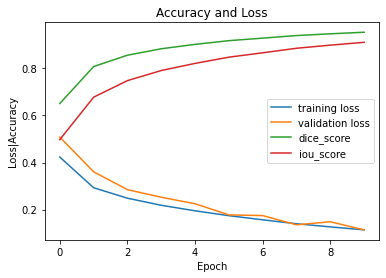

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import config 
fig = plt.figure()
numOfEpoch = config.EPOCH
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss') 
plt.plot(np.arange(0, numOfEpoch), H.history['dice_coef'], label='dice_score')
plt.plot(np.arange(0, numOfEpoch), H.history['iou_score'], label='iou_score')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

load unet v1 


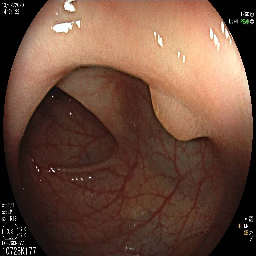

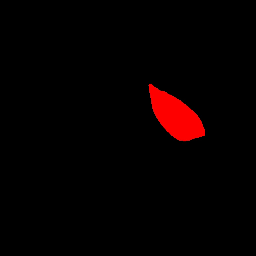

InvalidArgumentError: ignored

In [ ]:
import os
import config
from data_prepare import *
from google.colab.patches import cv2_imshow
import cv2
import train

model = train.load_model("unet-v1")
# model.summary()

test_image_list = [os.path.join(config.IMAGE_PATH, f'{x}') for x in os.listdir(config.IMAGE_PATH)]

for path in test_image_list[0:10]:
  test_img = read_image(path)  
  mask_img = read_image("/content/drive/MyDrive/20211/prj3/data/train_gt/train_gt/"+ str(path).split("/")[-1] )    
  cv2_imshow(test_img*256)
  cv2_imshow(mask_img*256)
  predict = model.predict(np.expand_dims(test_img, axis=0))[:]    
  predict_max = np.argmax(predict, axis=-1)   
  print(train.iou_score(predict_max[0],mask_img)) 
  cv2_imshow(predict_max[0]* 100)

In [ ]:
import test
import train

# nhớ sao lưu trước khi run test
# model = train.load_model("unet-v1")
test.predict(model)

done batch 20 image, current 20
done batch 20 image, current 40
done batch 20 image, current 60
done batch 20 image, current 80
done batch 20 image, current 100
done batch 20 image, current 120
done batch 20 image, current 140
done batch 20 image, current 160
done batch 20 image, current 180
done batch 20 image, current 200


In [ ]:
!python submit_origin.py